### É uma espécie de descritor de recursos, em que uma imagem é analisada, simplificada e suas informações consideradas mais importantes são extraídas, descartando as informações menos relevantes. Normalmente, um descritor de recurso converte uma imagem de tamanho L x A x 3 em um vetor de recurso/matriz de comprimento n. 

### É um algoritmo bastante útil para reconhecimento de imagem e detecção de objetos. O vetor de recursos produzido por esses algoritmos, quando alimentado em algoritmos de classificação de imagem, como SVM, produz resultados bem interessantes.

### No HoG, os histogramas de direções de gradientes (gradientes orientados) são usados como recursos. Gradientes de uma imagem são úteis porque a magnitude dos gradientes é grande em torno das bordas e cantos (regiões de mudanças abruptas de intensidade) e estas regiões contêm muito mais informações sobre a forma do objeto do que regiões planas.

## 1 - Pré-Processamento

## 2 - Calculando o Gradiente das Imagens

### É necessário primeiro calcular os gradientes horizontal e vertical; afinal, queremos calcular o histograma dos gradientes. Isso é facilmente obtido filtrando a imagem com kernels.

### É possível obter bons resultados usando o operador Sobel no OpenCV com tamanho de kernel 3.

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# lendo a imagem

img = cv2.imread('fire117.png')
img = np.float32(img) / 255.0

In [65]:
# Calculando o gradiente

gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)

In [66]:
# Encontrando a magnitude e direção (ângulo) do gradiente

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

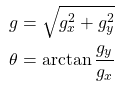

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


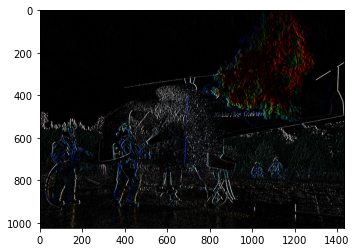

In [67]:
# valor absoluto do gradiente em X
plt.imshow(gx)

# este gradiente foca nas linhas verticais

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


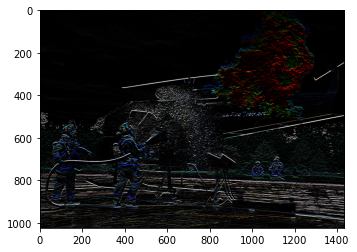

In [68]:
# valor absoluto do gradiente em Y
plt.imshow(gy)

# este gradiente foca nas horizontais

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


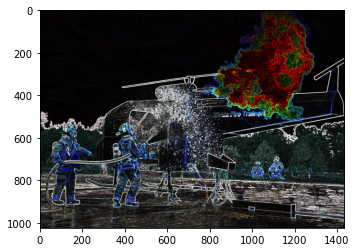

In [69]:
# magnitude do gradiente
plt.imshow(mag)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


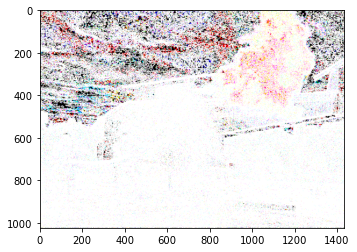

In [70]:
plt.imshow(angle)

### Em cada pixel, o gradiente tem uma magnitude e uma direção. Em imagens coloridas, os gradientes dos 3 canais são avaliados. A magnitude do gradiente em um pixel é o máximo da magnitude dos gradientes dos três canais e o ângulo é o ângulo correspondente ao gradiente máximo.